Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


C:\Users\elhad\AppData\Local\Temp\ipykernel_20592\1917238495.py:43: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 348ms/step - accuracy: 0.2670 - loss: 2.8835 - val_accuracy: 0.7892 - val_loss: 0.7307
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.6965 - loss: 1.0117 - val_accuracy: 0.8490 - val_loss: 0.4839
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 376ms/step - accuracy: 0.7583 - loss: 0.8024 - val_accuracy: 0.8917 - val_loss: 0.3977
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 368ms/step - accuracy: 0.8133 - loss: 0.6184 - val_accuracy: 0.9145 - val_loss: 0.3265
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.8310 - loss: 0.5458 - val_accuracy: 0.9174 - val_loss: 0.2999
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 337ms/step - accuracy: 0.8435 - loss: 0.4990 - val_accuracy: 0.9231 - val_loss: 0.2706
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.8615 - loss: 0.4398 - val_accuracy: 0.9174 - val_loss: 0.2917
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.8663 - loss: 0.4272 - val_accu

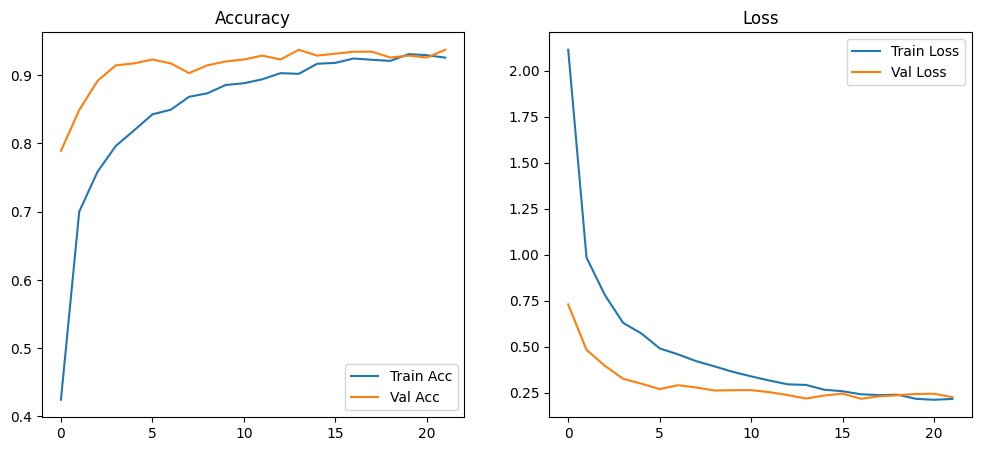

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


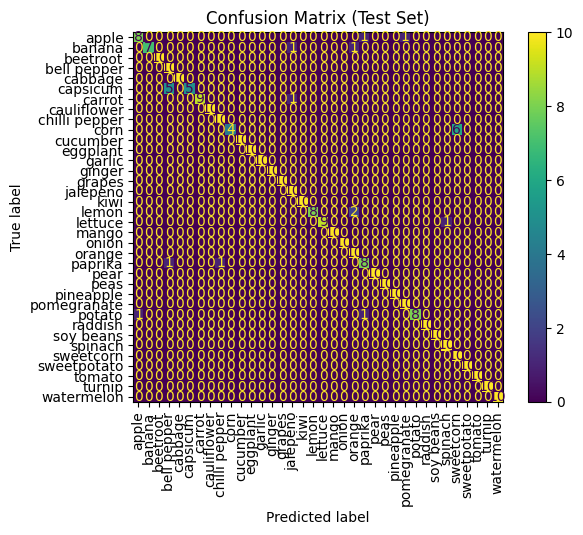

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_train_path = r'C:\\Users\\elhad\\Videos\\py project\\Fruits_Vegetables/train'
data_val_path = r'C:\\Users\\elhad\\Videos\\py project\\Fruits_Vegetables/validation'
data_test_path = r'C:\\Users\\elhad\\Videos\\py project\\Fruits_Vegetables/test'

img_width, img_height = 180, 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path, shuffle=True, image_size=(img_width, img_height), batch_size=batch_size
)
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path, shuffle=True, image_size=(img_width, img_height), batch_size=batch_size
)
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path, shuffle=False, image_size=(img_width, img_height), batch_size=batch_size
)

class_names = data_train.class_names

AUTOTUNE = tf.data.AUTOTUNE
data_train = data_train.prefetch(AUTOTUNE)
data_val = data_val.prefetch(AUTOTUNE)
data_test = data_test.prefetch(AUTOTUNE)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

history = model.fit(data_train, validation_data=data_val, epochs=30, callbacks=[early_stop, checkpoint])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

y_true, y_pred = [], []
for images, labels in data_test:
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(pred_labels.numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical')
plt.title("Confusion Matrix (Test Set)")
plt.show()

model.save('fruit_vegetable_model.keras')

In [3]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_true, y_pred)*100)


Test Accuracy: 93.59331476323119
